In [1]:
from scipy.stats import median_absolute_deviation as MAD
import pandas as pd
from os.path import join
from ast import literal_eval

In [4]:
dirDatasets=join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\Euclid')
fileName=r'04_COSMOS2015_FullMagLim_SOMinfo.csv'
idCol='Seq'
specZ='specZ'
specZ_KB='specZ_KB'
specZ_DEIMOS='zspec_DEIMOS'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'
cellIDs={'train':'cellID_TrainSOM','run':'cellID_RunSOM','runBig':'cellID_RunBigSOM'}
quantErr='quantErr'

In [3]:
dataset=pd.read_csv(join(dirDatasets,fileName))
for cellID in cellIDs.values():
    dataset[cellID]=[literal_eval(x) for x in dataset[cellID]]
dataset=dataset.astype({'specZ_outlCoeff': 'float','photoZ_SED_outlCoeff': 'float','photoZ_ML_outlCoeff': 'float'})

C:\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,45,46,47,48,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
groups=dataset.groupby('cellID_RunSOM')
data=groups['photoZ_SED'].apply(len).rename('occupation_total')
data=pd.concat([data,groups['photoZ_SED'].mean().rename('mean_photoZ_SED')],axis=1,sort=True)
data=pd.concat([data,groups['photoZ_SED'].apply(MAD).rename('NMAD_photoZ_SED')], axis=1,sort=True)

groups=dataset.dropna(subset=[specZ_KB]).groupby('cellID_RunSOM')
data=pd.concat([data,groups[specZ_KB].apply(len).rename('occupation_specZ')],axis=1,sort=True)
data=pd.concat([data,groups[specZ_KB].mean().rename('mean_specZ')],axis=1,sort=True)
data=pd.concat([data,groups[specZ_KB].apply(MAD).rename('NMAD_specZ')],axis=1,sort=True)

groups=dataset.dropna(subset=[specZ_DEIMOS]).groupby('cellID_RunSOM')
data=pd.concat([data,groups[specZ_DEIMOS].apply(len).rename('occupation_specZ_DEIMOS')],axis=1,sort=True)
data=pd.concat([data,groups[specZ_DEIMOS].mean().rename('mean_specZ_DEIMOS')],axis=1,sort=True)
data=pd.concat([data,groups[specZ_DEIMOS].apply(MAD).rename('NMAD_specZ_DEIMOS')],axis=1,sort=True)

In [6]:
data[data['occupation_specZ']>20]

occupation_total  mean_photoZ_SED  NMAD_photoZ_SED  occupation_specZ  \
0  23               294         0.720765         0.436626             102.0   
   24               510         0.227112         0.103782             313.0   
1  17               724         0.533435         0.099334              46.0   
   18               277         0.729155         0.088956              26.0   
   19               262         0.570309         0.072647              28.0   
...                 ...              ...              ...               ...   
18 24               410         1.236727         0.078578              32.0   
19 8                648         1.170560         0.084508              35.0   
21 8                689         1.145552         0.100817              49.0   
   9               1160         1.055731         0.108230              83.0   
22 9                551         1.138120         0.066717              33.0   

       mean_specZ  NMAD_specZ  occupation_specZ_DEIMOS  mean_specZ_DEIMOS  \
0  23    0.323324    0.109421                     13.0           0.610508   
   24    0.208496    0.084257                     44.0           0.222441   
1  17    0.184966    0.055816                      NaN                NaN   
   18    0.147624    0.043276                      1.0           0.165400   
   19    0.175591    0.050241                      5.0           0.170580   
...           ...         ...                      ...                ...   
18 24    1.007098    0.061958                      9.0           1.111000   
19 8     1.107215    0.037534                     16.0           1.183469   
21 8     1.053876    0.090661                     18.0           1.111089   
   9     1.006670    0.097989                     24.0           1.002958   
22 9     1.106233    0.060732                     13.0           1.165077   

       NMAD_specZ_DEIMOS  
0  23           0.083322  
   24           0.088437  
1  17                NaN  
   18           0.000000  
   19           0.020015  
...                  ...  
18 24           0.161603  
19 8            0.048185  
21 8            0.081543  
   9            0.098074  
22 9            0.073389  

[183 rows x 9 columns]

In [7]:
data[data['occupation_specZ_DEIMOS']>20]

occupation_total  mean_photoZ_SED  NMAD_photoZ_SED  occupation_specZ  \
0  24               510         0.227112         0.103782             313.0   
2  1                624         0.437870         0.139364             408.0   
3  0               2052         0.587863         0.281694            1406.0   
   1                594         0.519399         0.201634             336.0   
   2                834         0.366796         0.089697             344.0   
   20               860         0.361914         0.082284             264.0   
4  0                994         0.835186         0.182360             475.0   
   1               1001         0.608619         0.204599             451.0   
   2                817         0.531863         0.185325             301.0   
   3                417         0.481938         0.157156             153.0   
   4                526         0.390734         0.073389             136.0   
   5                454         0.409595         0.068941             157.0   
5  0                941         0.850334         0.201634             318.0   
   1                338         0.663914         0.170499             111.0   
   3                412         0.627369         0.135658             124.0   
   4                473         0.502526         0.154190             144.0   
   16               590         0.373405         0.042254             215.0   
6  0                934         0.913483         0.141588             287.0   
   3                391         0.618363         0.124538             122.0   
   4                529         0.563919         0.124538             161.0   
7  0                867         1.096662         0.228320             131.0   
   2                308         0.805130         0.124538              76.0   
   3                448         0.774513         0.123797             110.0   
   4                431         0.668065         0.068200             146.0   
   5                671         0.661113         0.069682             165.0   
   24               670         0.539378         0.088956             247.0   
8  0                630         1.086124         0.184584             110.0   
   1                308         0.958617         0.091921              58.0   
   2                514         0.903778         0.092663             116.0   
   3                698         0.822735         0.140847             153.0   
   4                331         0.752323         0.105265              78.0   
   5                527         0.666207         0.074130             147.0   
9  0                630         1.212435         0.168275              53.0   
   1                240         1.034867         0.130469              32.0   
   2                221         0.981407         0.097852              41.0   
   3                394         0.936452         0.093404              77.0   
   4                743         0.887174         0.099334             119.0   
10 0                293         1.333720         0.128986              12.0   
11 2                323         1.185985         0.126021              21.0   
   3                478         0.985753         0.121573              93.0   
   4                381         0.869882         0.099334              94.0   
   18               790         0.866713         0.075613             139.0   
12 2                791         1.222373         0.133434              53.0   
   3                476         1.049742         0.127504              86.0   
   4                412         0.977794         0.086732              85.0   
   5                412         0.864556         0.096369             100.0   
13 4                475         1.057267         0.108230              59.0   
   5                557         0.911777         0.085991             124.0   
14 7                828         0.925088         0.084508             141.0   
   8                788         0.930160         0.071906

In [148]:
groups=dataset.groupby('cellID_RunBigSOM')
dataBig=groups['photoZ_SED'].apply(len).rename('occupation_total')
dataBig=pd.concat([dataBig,groups['photoZ_SED'].mean().rename('mean_photoZ_SED')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['photoZ_SED'].apply(MAD).rename('NMAD_photoZ_SED')], axis=1,sort=True)

groups=dataset.dropna(subset=['specZ_KB']).groupby('cellID_RunBigSOM')
dataBig=pd.concat([dataBig,groups['specZ_KB'].apply(len).rename('occupation_specZ')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['specZ_KB'].mean().rename('mean_specZ')],axis=1,sort=True)
dataBig=pd.concat([dataBig,groups['specZ_KB'].apply(MAD).rename('NMAD_specZ')],axis=1,sort=True)

#### For saving spec-z that have 'unreliable' Qf, but good SOM specZ_outlCoeff ###

In [8]:
import matplotlib.pyplot as plt

In [9]:
import numpy as np

In [115]:
def filterSpecZ(dataset,QfCol='Q_f',specZ_outlCoeff='z_spec_outlCoeff_noQF',outlCoefCriteria=1):
    if QfCol:
        if specZ_outlCoeff:
            filteredDataset=dataset[((dataset[QfCol]>2) & (dataset[QfCol]<5)) |
                                ((dataset[QfCol]>22) & (dataset[QfCol]<25)) |
                                (dataset[specZ_outlCoeff].abs()<=outlCoefCriteria)]
        else:
            filteredDataset=dataset[((dataset[QfCol]>2) & (dataset[QfCol]<5)) |
                                ((dataset[QfCol]>22) & (dataset[QfCol]<25))]
    else:
        filteredDataset=dataset[dataset[specZ_outlCoeff].abs()<=outlCoefCriteria]
    print(len(filteredDataset))
    return filteredDataset

In [116]:
dataset.columns

Index(['RAJ2000', 'DEJ2000', 'Seq_1', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'photoZ_SED', 'specZ_KB', 'Instr_KB', 'Q_f_KB',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'photoZ_ML', 'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3',
       'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3',
       'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3',
       'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM',
       'cellID_RunBigSOM', 'specZ_outlCoeff', 'photoZ_ML_outlCoeff',
       'photoZ_SED_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation',
       'Instr', 'ORI_RA', 'ORI_Dec', 'ORI_ID', 'z_spec', 'Q_f', 'RA_corr',
       'Dec_corr', 'ID_1', 'ALPHA_J2000', 'DELTA_J2000', 'GroupID',
       'GroupSize', 'Contact', 'Separation_1', '

In [127]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='specZ_KB' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)
data=groups[photoZ].apply(len).rename('occupation_total')
data=pd.concat([data,groups[photoZ].mean().rename('mean_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].median().rename('median_'+photoZ)],axis=1,sort=True)
data=pd.concat([data,groups[photoZ].apply(MAD).rename('NMAD_'+photoZ)], axis=1,sort=True)

specZ='z_spec'
groups=filterSpecZ(dataset.dropna(subset=[specZ]),specZ_outlCoeff='z_spec_outlCoeff_noQF').groupby(cellID)
data=pd.concat([data,groups[specZ].apply(len).rename('occupation_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].median().rename('median_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].mean().rename('mean_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].apply(MAD).rename('NMAD_'+specZ)],axis=1,sort=True)

groups=dataset.dropna(subset=[specZ_DEIMOS]).groupby(cellID)
data=pd.concat([data,groups[specZ_DEIMOS].apply(len).rename('occupation_'+specZ_DEIMOS)],axis=1,sort=True)
data=pd.concat([data,groups[specZ_DEIMOS].median().rename('median_'+specZ_DEIMOS)],axis=1,sort=True)
data=pd.concat([data,groups[specZ_DEIMOS].mean().rename('mean_'+specZ_DEIMOS)],axis=1,sort=True)
data=pd.concat([data,groups[specZ_DEIMOS].apply(MAD).rename('NMAD_'+specZ_DEIMOS)],axis=1,sort=True)

specZ='specZ_KB'
groups=filterSpecZ(dataset.dropna(subset=[specZ]),specZ_outlCoeff=None).groupby(cellID)
data=pd.concat([data,groups[specZ].apply(len).rename('occupation_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].median().rename('median_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].mean().rename('mean_'+specZ)],axis=1,sort=True)
data=pd.concat([data,groups[specZ].apply(MAD).rename('NMAD_'+specZ)],axis=1,sort=True)

27550
19887


In [128]:
d=data[data['occupation_'+specZ]>20]
d

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  23               294         0.720765             0.3700         0.436626   
   24               510         0.227112             0.1200         0.103782   
1  17               724         0.533435             0.1880         0.099334   
   18               277         0.729155             0.1790         0.088956   
   19               262         0.570309             0.1955         0.072647   
...                 ...              ...                ...              ...   
18 24               410         1.236727             1.2390         0.078578   
19 8                648         1.170560             1.1760         0.084508   
21 8                689         1.145552             1.1500         0.100817   
   9               1160         1.055731             1.0470         0.108230   
22 9                551         1.138120             1.1400         0.066717   

       occupation_z_spec  median_z_spec  mean_z_spec  NMAD_z_spec  \
0  23              106.0       0.265235     0.314972     0.114976   
   24              327.0       0.125035     0.202430     0.084079   
1  17               87.0       0.165960     0.169954     0.061469   
   18               42.0       0.146312     0.148238     0.050009   
   19               50.0       0.186650     0.172731     0.049593   
...                  ...            ...          ...          ...   
18 24               47.0       1.124337     1.034679     0.058360   
19 8                93.0       1.097600     1.088686     0.085843   
21 8               111.0       1.095158     1.068769     0.099819   
   9               177.0       0.997500     1.008140     0.084805   
22 9                65.0       1.121265     1.110936     0.059644   

       occupation_zspec_DEIMOS  median_zspec_DEIMOS  mean_zspec_DEIMOS  \
0  23                     13.0               0.2660           0.610508   
   24                     44.0               0.1270           0.222441   
1  17                      NaN                  NaN                NaN   
   18                      1.0               0.1654           0.165400   
   19                      5.0               0.2075           0.170580   
...                        ...                  ...                ...   
18 24                      9.0               1.1760           1.111000   
19 8                      16.0               1.2295           1.183469   
21 8                      18.0               1.1655           1.111089   
   9                      24.0               1.0120           1.002958   
22 9                      13.0               1.2030           1.165077   

       NMAD_zspec_DEIMOS  occupation_specZ_KB  median_specZ_KB  mean_specZ_KB  \
0  23           0.083322                102.0         0.267072       0.323324   
   24           0.088437                313.0         0.127820       0.208496   
1  17                NaN                 46.0         0.165650       0.184966   
   18           0.000000                 26.0         0.136211       0.147624   
   19           0.020015                 28.0         0.186650       0.175591   
...                  ...                  ...              ...            ...   
18 24           0.161603                 32.0         1.131948       1.007098   
19 8            0.048185                 35.0         1.151184       1.107215   
21 8            0.081543                 49.0         1.114050       1.053876   
   9            0.098074                 83.0         0.990493       1.006670   
22 9            0.073389                 33.0         1.118263       1.106233   

       NMAD_specZ_KB  
0  23       0.109421  
   24       0.084257  
1  17       0.055816  
   18       0.043276  
   19       0.050241  
...              ...  
18 24       0.061958  
19 8        0.037534  
21 8        0.090661  
   9        0.097989  
22 9        0.060732  

[183 rows x 16 columns]

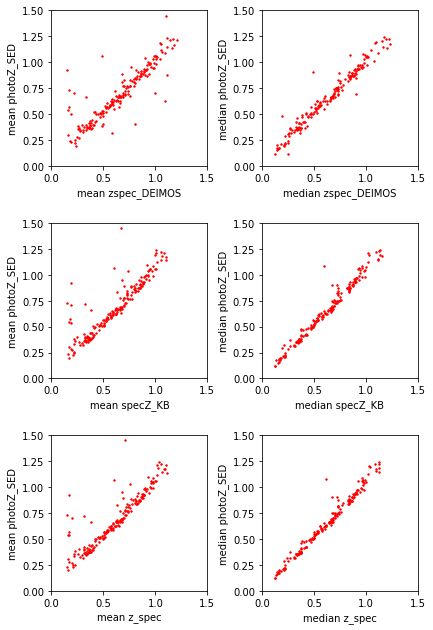

In [129]:
fig, axs=plt.subplots(3,2,figsize=(6,9))
s=2

ax=axs[0][0]
ax.scatter(d['mean_'+specZ_DEIMOS],d['mean_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('mean '+specZ_DEIMOS)
ax.set_ylabel('mean '+photoZ)
ax.set_aspect(1)
ax=axs[0][1]
ax.scatter(d['median_'+specZ_DEIMOS],d['median_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('median '+specZ_DEIMOS)
ax.set_ylabel('median '+photoZ)
ax.set_aspect(1)

specZ='specZ_KB'
ax=axs[1][0]
ax.scatter(d['mean_'+specZ],d['mean_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('mean '+specZ)
ax.set_ylabel('mean '+photoZ)
ax.set_aspect(1)
ax=axs[1][1]
ax.scatter(d['median_'+specZ],d['median_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('median '+specZ)
ax.set_ylabel('median '+photoZ)
ax.set_aspect(1)

specZ='z_spec'
ax=axs[2][0]
ax.scatter(d['mean_'+specZ],d['mean_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('mean '+specZ)
ax.set_ylabel('mean '+photoZ)
ax.set_aspect(1)
ax=axs[2][1]
ax.scatter(d['median_'+specZ],d['median_'+photoZ],s=s,c='red')
ax.set_xlim(0,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('median '+specZ)
ax.set_ylabel('median '+photoZ)
ax.set_aspect(1)

plt.tight_layout()

### Checking why some groups have so different mean specZ and photoZ

In [130]:
cellID='cellID_RunSOM' # 'cellID_RunSOM' or 'cellID_RunBigSOM'
photoZ='photoZ_SED' # 'photoZ_SED' or 'photoZ_ML' (only for z<1.2!)
specZ='z_spec' # 'specZ_KB' for Q_f cleaned or 'z_spec' for all specZ, including those with bad Q_f

groups=dataset.groupby(cellID)

In [132]:
d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15]

occupation_total  mean_photoZ_SED  median_photoZ_SED  NMAD_photoZ_SED  \
0  23               294         0.720765             0.3700         0.436626   
1  17               724         0.533435             0.1880         0.099334   
   18               277         0.729155             0.1790         0.088956   
   19               262         0.570309             0.1955         0.072647   
   20               188         0.705356             0.2145         0.112678   
   24                75         1.064040             0.9020         0.788743   
2  23               322         1.556373             1.6875         0.424765   
   24               154         1.447955             1.6505         0.432178   
3  4                559         0.383984             0.2920         0.114160   
   22               289         0.951585             0.9000         0.355824   
4  22               227         0.831542             0.7480         0.170499   
   23               113         1.031726             1.0810         0.112678   
6  11               547         0.662980             0.4630         0.169016   
7  0                867         1.096662             1.0540         0.228320   
   24               670         0.539378             0.1600         0.088956   
8  24               386         0.921845             0.1985         0.151225   
9  0                630         1.212435             1.2035         0.168275   
   6                248         0.890831             0.7515         0.196444   
11 2                323         1.185985             1.1930         0.126021   
12 2                791         1.222373             1.2220         0.133434   
18 24               410         1.236727             1.2390         0.078578   

       occupation_z_spec  median_z_spec  mean_z_spec  NMAD_z_spec  \
0  23              106.0       0.265235     0.314972     0.114976   
1  17               87.0       0.165960     0.169954     0.061469   
   18               42.0       0.146312     0.148238     0.050009   
   19               50.0       0.186650     0.172731     0.049593   
   20               35.0       0.203473     0.195247     0.026578   
   24               25.0       0.676959     0.606090     0.321906   
2  23               27.0       0.828061     0.807406     0.201602   
   24               24.0       0.693400     0.704222     0.143063   
3  4               141.0       0.206947     0.227640     0.120161   
   22               63.0       0.717300     0.678980     0.182217   
4  22               50.0       0.669380     0.628201     0.104303   
   23               23.0       0.615100     0.756365     0.146629   
6  11               37.0       0.371000     0.384309     0.060336   
7  0               206.0       0.925554     0.928437     0.105934   
   24              313.0       0.141899     0.154966     0.063651   
8  24               74.0       0.161791     0.169803     0.072824   
9  0               113.0       1.027300     1.015112     0.127462   
   6                34.0       0.680855     0.685718     0.045880   
11 2                48.0       1.040562     1.023593     0.092718   
12 2               113.0       1.084176     1.056389     0.099607   
18 24               47.0       1.124337     1.034679     0.058360   

       occupation_zspec_DEIMOS  median_zspec_DEIMOS  mean_zspec_DEIMOS  \
0  23                     13.0              0.26600           0.610508   
1  17                      NaN                  NaN                NaN   
   18                      1.0              0.16540           0.165400   
   19                      5.0              0.20750           0.170580   
   20                      2.0              0.22060           0.220600   
   24                      2.0              0.48600           0.486000   
2  23                      5.0              1.27400           1.388040   
   24                      3.0              1.20930           1.103933   
3  4                      13.0              0.21980          

In [133]:
badCells=d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])>0.15].index

In [136]:
len(badCells)

21

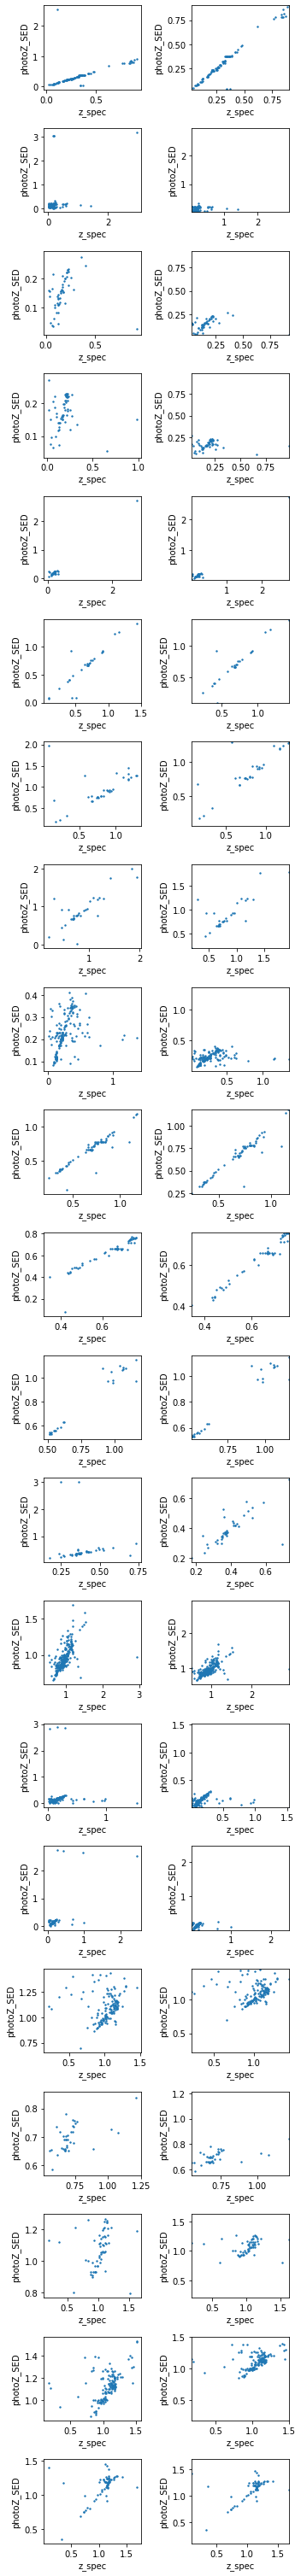

In [146]:
fig, axs=plt.subplots(len(badCells),2,figsize=(5,len(badCells)*2))
for i, ax in enumerate(axs):
    data=dataset[dataset[cellID]==badCells[i]]
    ax[0].scatter(data['z_spec'],data['photoZ_SED'],s=s)
    ax[0].set_xlabel('z_spec')
    ax[0].set_ylabel('photoZ_SED')
    
    ax[1].scatter(data['z_spec'],data['photoZ_SED'],s=s)
    ax[1].set_xlabel('z_spec')
    ax[1].set_ylabel('photoZ_SED')
    ax[1].set_xlim(data['z_spec'].min(),data['z_spec'].max())
    ax[1].set_ylim(data['z_spec'].min(),data['z_spec'].max())
plt.tight_layout()

In [143]:
goodCells=d[np.abs(d['mean_'+specZ]-d['mean_'+photoZ])<0.005].index
len(goodCells)

10

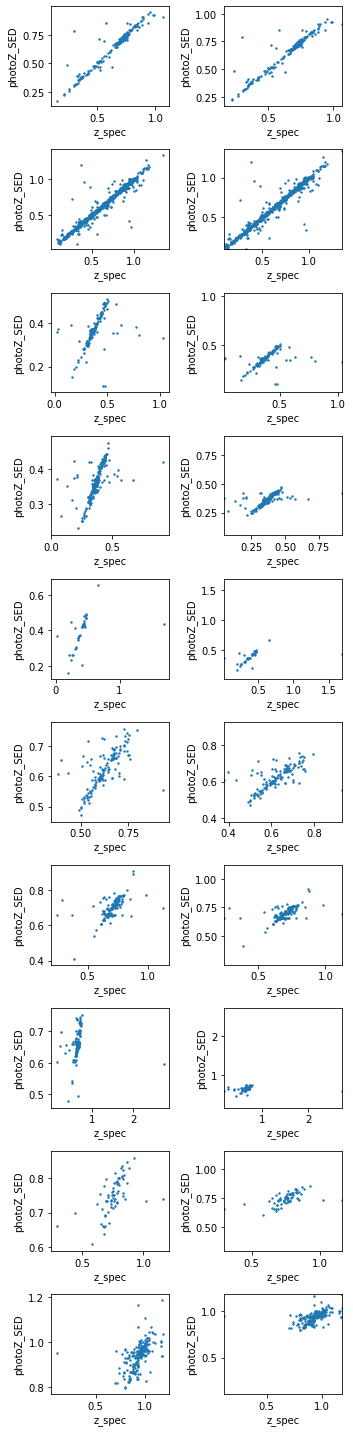

In [147]:
fig, axs=plt.subplots(len(goodCells),2,figsize=(5,len(goodCells)*2))
for i, ax in enumerate(axs):
    data=dataset[dataset[cellID]==goodCells[i]]
    ax[0].scatter(data['z_spec'],data['photoZ_SED'],s=s)
    ax[0].set_xlabel('z_spec')
    ax[0].set_ylabel('photoZ_SED')
    
    ax[1].scatter(data['z_spec'],data['photoZ_SED'],s=s)
    ax[1].set_xlabel('z_spec')
    ax[1].set_ylabel('photoZ_SED')
    ax[1].set_xlim(data['z_spec'].min(),data['z_spec'].max())
    ax[1].set_ylim(data['z_spec'].min(),data['z_spec'].max())
plt.tight_layout()